# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberta a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno</b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-danger">
<b>Comentário geral v1: </b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Taina! Seu projeto já está com uma qualidade excelente. Parabéns! Para prosseguirmos com a aprovação, necessitamos de alguns ajustes nas sessões: 
    

    - Realizar a análise do tamanho médio acumulado do pedido.
    - Realizar a análise  na diferença relativa do tamanho médio do pedido 
 
     
Estou à disposição para qualquer dúvida!

Boa sorte!🍀
</div>

<div class="alert alert-block alert-success">
<b>Comentário geral v2: </b> <a class="tocSkip"></a>
    
    
Arrasou! :) Muito obrigada pelos ajustes. O projeto está aprovado!

In [48]:
#Importar as bibliotecas:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats
from scipy.stats import norm
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
from scipy.stats import mannwhitneyu, norm

In [49]:
#Carregar os dados

hypotheses_df = pd.read_csv("/datasets/hypotheses_us.csv", sep=";")
orders_df = pd.read_csv("/datasets/orders_us.csv", sep=",")
visits_df = pd.read_csv("/datasets/visits_us.csv", sep=",")

## Parte 1: Priorizando Hipóteses

In [50]:
hypotheses_df.head()

hypotheses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [51]:
# Aplicar a fórmula do ICE: (Impact * Confidence) / Effort
hypotheses_df["ICE"] = (hypotheses_df["Impact"] * hypotheses_df["Confidence"]) / hypotheses_df["Effort"]

# Aplicar a fórmula do RICE: (Reach * Impact * Confidence) / Effort
hypotheses_df["RICE"] = (hypotheses_df["Reach"] * hypotheses_df["Impact"] * hypotheses_df["Confidence"]) / hypotheses_df["Effort"]

# Classificar as hipóteses com base nos scores
df_ice_sorted = hypotheses_df.sort_values(by="ICE", ascending=False)
df_rice_sorted = hypotheses_df.sort_values(by="RICE", ascending=False)

# Exibir os resultados
print("Prioridade por ICE:")
print(df_ice_sorted[["Hypothesis", "ICE"]])

print("\nPrioridade por RICE:")
print(df_rice_sorted[["Hypothesis", "RICE"]])

Prioridade por ICE:
                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000

Prioridade por RICE:
                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promot

<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>
    
RICE e ICE calculados com sucesso! 

Sugestão:
Aqui você poderia plotar a distribuição dos atributos de cada hipótese usando um gráfico de caixa (boxplot). 
    
```python
df_hypotheses.drop(columns=['ICE', 'RICE']).boxplot(figsize=(10, 6))
... # seu código
```
    
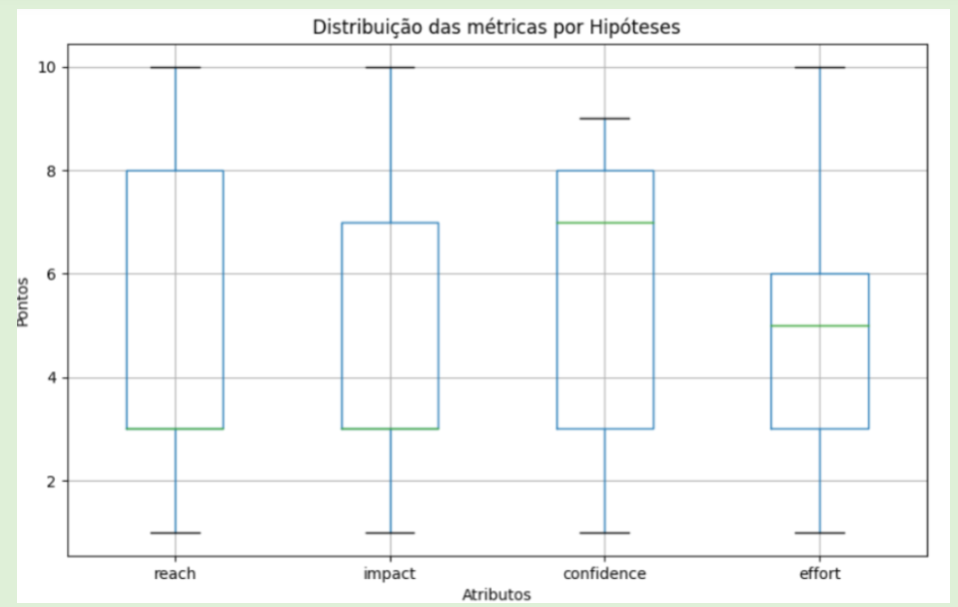    

    
</div>




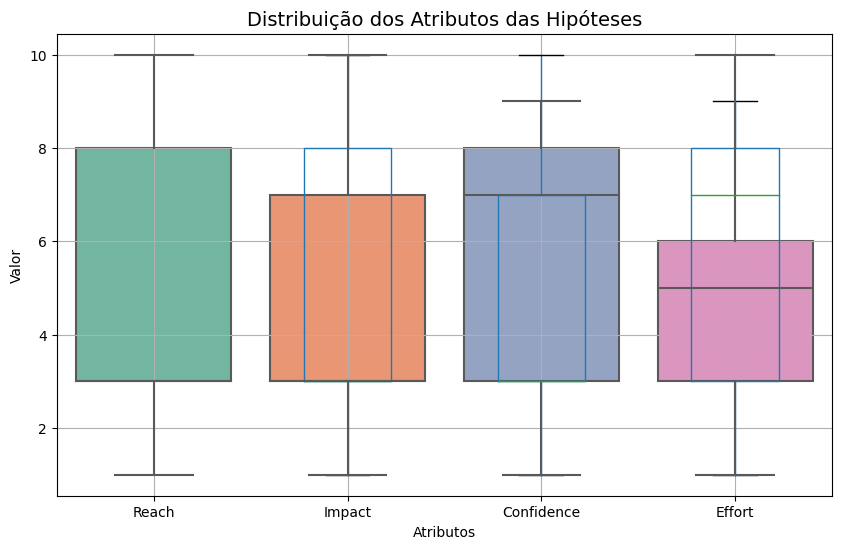

In [52]:
#Distribuição dos atributos através de um gráfico de caixa:

hypotheses_df.drop(columns=['ICE', 'RICE']).boxplot(figsize=(10, 6))
sns.boxplot(data=hypotheses_df[['Reach', 'Impact', 'Confidence', 'Effort']], palette="Set2")
plt.title("Distribuição dos Atributos das Hipóteses", fontsize=14)
plt.ylabel("Valor")
plt.xlabel("Atributos")
plt.grid(True)

plt.show()

Considerações sobre ICE e RICE:

Top 3 no ICE:
1️ "Launch a promotion that gives users discounts" (ICE = 16.2)
2️ "Add two new channels for attracting traffic" (ICE = 13.33)
3️ "Add a subscription form to all the main pages" (ICE = 11.2)

Top 3 no RICE:
1️ "Add a subscription form to all the main pages" (RICE = 112)
2️ "Add product recommendation blocks to the store" (RICE = 56)
3️ "Add two new channels for attracting traffic" (RICE = 40)

Diferenças nos resultados:
1️. "Add a subscription form to all the main pages" subiu do 3º no ICE para o 1º no RICE
O Reach dessa hipótese provavelmente é alto, ou seja, ela impacta um grande número de usuários.Como o ICE não considera Reach, essa hipótese estava subestimada antes.

2️. "Launch a promotion that gives users discounts" caiu do 1º no ICE para o 5º no RICE
Isso indica que, apesar de seu alto impacto e confiança, o alcance da promoção é menor do que outras hipóteses.

3️. "Add product recommendation blocks" subiu do 5º no ICE para o 2º no RICE
Mostra que a recomendação de produtos impacta muitos usuários, aumentando sua prioridade no RICE.

4️. "Launch your own delivery service" e "Change the background color" continuam com baixa prioridade em ambos os métodos
Essas hipóteses têm baixa efetividade geral, seja por impacto, confiança ou alcance limitados.

Conclusão
ICE destaca hipóteses com maior impacto e confiança, sem considerar o alcance. Enquanto RICE é mais completo, uma vez que inclui Reach, priorizando hipóteses que afetam mais usuários.Hipóteses que pareciam boas no ICE podem cair no RICE se impactarem poucas pessoas.
Para otimizar a receita global, o RICE é mais estratégico.


## Parte 2: Análise de teste A/B

In [53]:
orders_df.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [54]:
visits_df.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


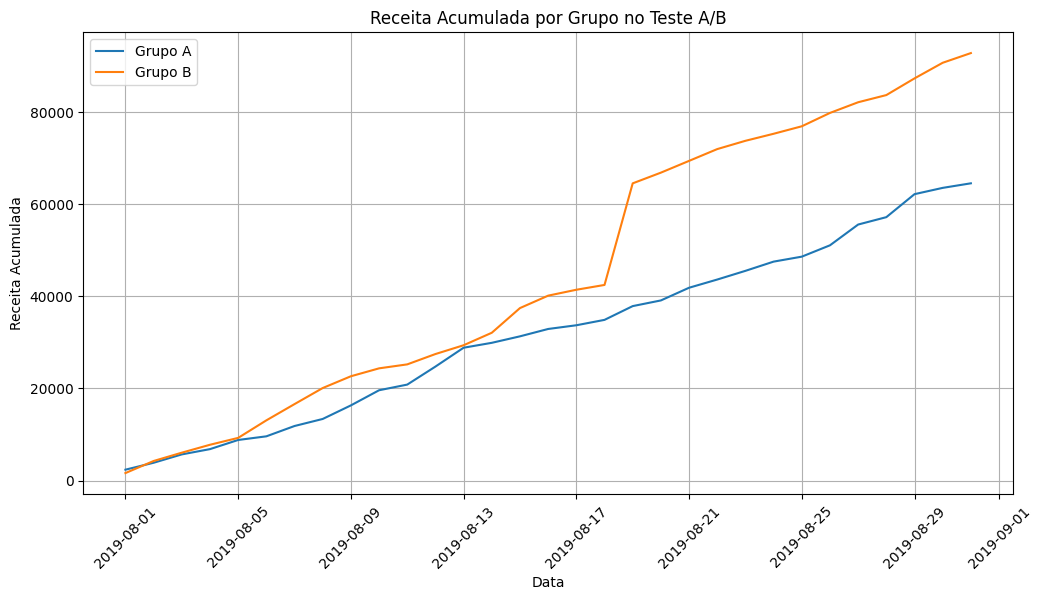

In [55]:
# Converter a coluna 'date' para formato datetime
orders_df['date'] = pd.to_datetime(orders_df['date'])
visits_df['date'] = pd.to_datetime(visits_df['date'])

# Criar DataFrame da receita acumulada por grupo
cumulative_revenue = (
    orders_df.groupby(["date", "group"])["revenue"]
    .sum()
    .groupby(level="group")
    .cumsum()
    .reset_index()
)

# Criar gráfico
plt.figure(figsize=(12, 6))
for group in cumulative_revenue["group"].unique():
    subset = cumulative_revenue[cumulative_revenue["group"] == group]
    plt.plot(subset["date"], subset["revenue"], label=f"Grupo {group}")

# Configurações do gráfico
plt.title("Receita Acumulada por Grupo no Teste A/B")
plt.xlabel("Data")
plt.ylabel("Receita Acumulada")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Observações sobre o Gráfico de Receita Acumulada:
No começo do teste, os grupos A e B apresentavam receitas acumuladas semelhantes.
Em determinado momento as receitas linhas se igualam, indicando que até esse ponto ambos os grupos tiveram desempenho parecido.
Após essa data, o Grupo B supera o Grupo A e mantém a vantagem, sugerindo que a variação testada no Grupo B pode ter gerado mais receita.

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>
    
- Receita acumulada calculada com sucesso
- Foram adicionados comentários relevantes para análise

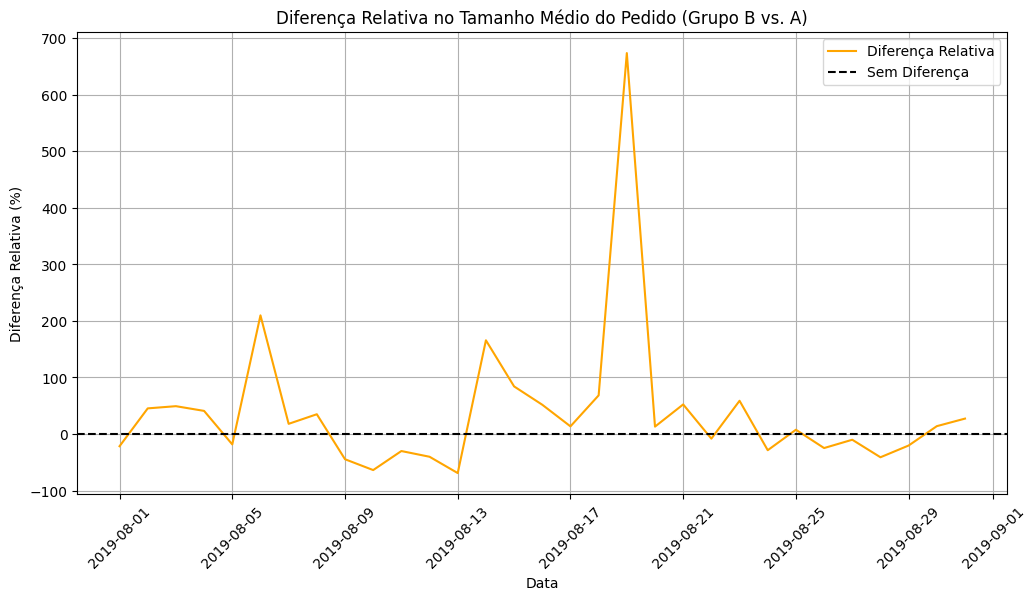

In [56]:
# Calcular a receita média acumulada por pedido para cada grupo
orders_df['order_value'] = orders_df['revenue']  # O valor do pedido é o mesmo que a receita

# Calcular a receita acumulada por grupo e a quantidade de pedidos
cumulative_order_value = orders_df.groupby(["date", "group"])["order_value"].sum().reset_index()
cumulative_orders_count = orders_df.groupby(["date", "group"])["transactionId"].count().reset_index()

# Calcular o valor médio do pedido acumulado
cumulative_avg_order_value = pd.merge(cumulative_order_value, cumulative_orders_count, on=["date", "group"])
cumulative_avg_order_value["avg_order_value"] = cumulative_avg_order_value["order_value"] / cumulative_avg_order_value["transactionId"]

# Calcular a diferença relativa no tamanho médio do pedido entre os grupos
avg_order_value_A = cumulative_avg_order_value[cumulative_avg_order_value["group"] == "A"]
avg_order_value_B = cumulative_avg_order_value[cumulative_avg_order_value["group"] == "B"]

# Merge de ambos os grupos
merged = pd.merge(avg_order_value_A[["date", "avg_order_value"]], avg_order_value_B[["date", "avg_order_value"]], on="date", suffixes=('_A', '_B'))

# Calcular a diferença relativa
merged["relative_difference"] = ((merged["avg_order_value_B"] - merged["avg_order_value_A"]) / merged["avg_order_value_A"]) * 100

# Gerar o gráfico da diferença relativa
plt.figure(figsize=(12, 6))
plt.plot(merged["date"], merged["relative_difference"], label="Diferença Relativa", color='orange')
plt.axhline(0, color='black', linestyle='--', label="Sem Diferença")

# Configurações do gráfico
plt.title("Diferença Relativa no Tamanho Médio do Pedido (Grupo B vs. A)")
plt.xlabel("Data")
plt.ylabel("Diferença Relativa (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


Quando a linha de diferença relativa estiver acima de 0%, o Grupo B tem um desempenho melhor em termos de tamanho médio de pedidos. Se ela estiver abaixo de 0%, o Grupo A está gerando pedidos maiores.
Os picos podem ser indicativos de outliers ou eventos específicos que afetaram apenas um dos grupos (como promoções ou compras maiores).

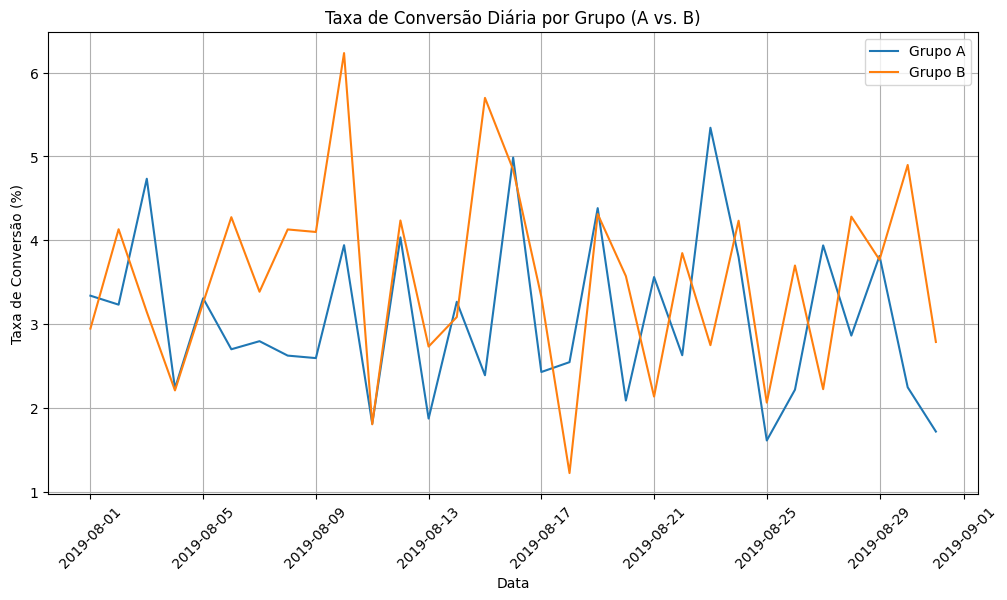

In [57]:
# Contar o número de pedidos por grupo e data
orders_count = orders_df.groupby(['date', 'group'])['transactionId'].count().reset_index()
orders_count = orders_count.rename(columns={"transactionId": "orders_count"})

# Contar o número de visitas por grupo e data
visits_count = visits_df.groupby(['date', 'group'])['visits'].sum().reset_index()

# Mesclar os dados de pedidos e visitas
conversion_data = pd.merge(orders_count, visits_count, on=["date", "group"])

# Calcular a taxa de conversão
conversion_data["conversion_rate"] = (conversion_data["orders_count"] / conversion_data["visits"]) * 100

# Plotar o gráfico de taxas de conversão
plt.figure(figsize=(12, 6))
for group in conversion_data['group'].unique():
    group_data = conversion_data[conversion_data['group'] == group]
    plt.plot(group_data['date'], group_data['conversion_rate'], label=f"Grupo {group}")

# Configurações do gráfico
plt.title("Taxa de Conversão Diária por Grupo (A vs. B)")
plt.xlabel("Data")
plt.ylabel("Taxa de Conversão (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [58]:
# Calcular o número de pedidos por usuário
orders_per_user = orders_df.groupby('visitorId')['transactionId'].count().reset_index()
orders_per_user = orders_per_user.rename(columns={"transactionId": "orders_per_user"})

# Calcular os percentis 95 e 99 para o número de pedidos por usuário
percentile_95 = orders_per_user["orders_per_user"].quantile(0.95)
percentile_99 = orders_per_user["orders_per_user"].quantile(0.99)

# Identificar anomalias: Pedidos acima do percentil 99
anomalies = orders_per_user[orders_per_user["orders_per_user"] > percentile_99]

# Exibir os percentis e as anomalias encontradas
print(f"Percentil 95: {percentile_95}")
print(f"Percentil 99: {percentile_99}")
print("Anomalias (Usuários com pedidos acima do percentil 99):")
print(anomalies)


Percentil 95: 2.0
Percentil 99: 4.0
Anomalias (Usuários com pedidos acima do percentil 99):
       visitorId  orders_per_user
44     199603092                5
55     237748145                5
299   1230306981                5
487   2038680547                8
569   2378935119                9
591   2458001652               11
744   3062433592                5
897   3717692402                5
917   3803269165                5
1023  4256040402               11


<div class="alert alert-block alert-danger">
<b> Comentário: </b> <a class="tocSkip"></a>
    
É necessário realizar as seguintes tarefas:
    
- Tamanho médio acumulado do pedido. É esperado um output semelhante a esse: 
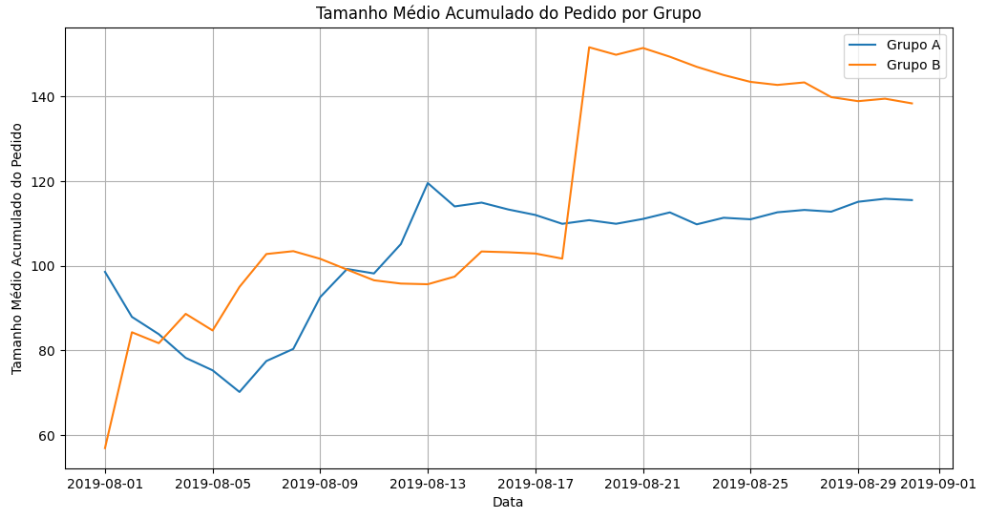
- Diferença relativa do tamanho do pedido 
    
Output esperado:
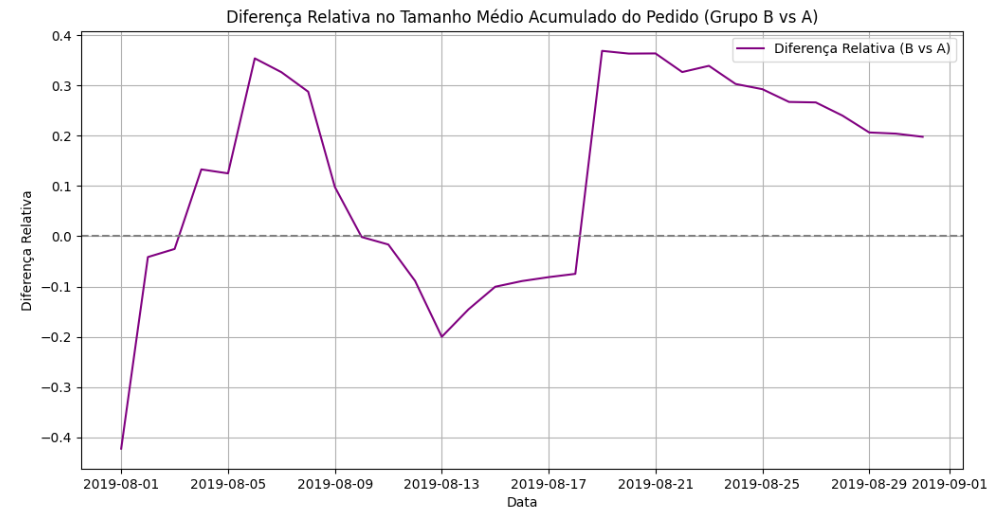

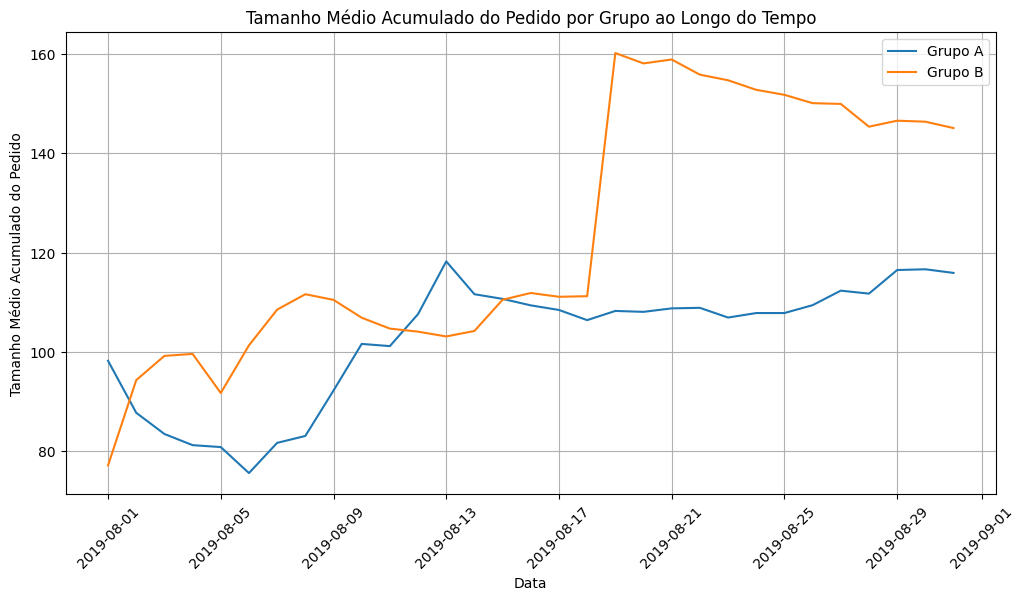

In [59]:
#Tamanho médio acumulado do pedido:

# Criar um DataFrame para armazenar os valores acumulados
cumulative_data = orders_df.groupby(['date', 'group'])['revenue'].sum().groupby(level=1).cumsum()
cumulative_orders = orders_df.groupby(['date', 'group'])['transactionId'].count().groupby(level=1).cumsum()

# Calcular o tamanho médio do pedido acumulado
cumulative_avg_order = cumulative_data / cumulative_orders

# Criar o gráfico
plt.figure(figsize=(12, 6))
for group in cumulative_avg_order.index.get_level_values(1).unique():
    plt.plot(cumulative_avg_order.xs(group, level='group'), label=f'Grupo {group}')

plt.xlabel("Data")
plt.ylabel("Tamanho Médio Acumulado do Pedido")
plt.title("Tamanho Médio Acumulado do Pedido por Grupo ao Longo do Tempo")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

plt.show()

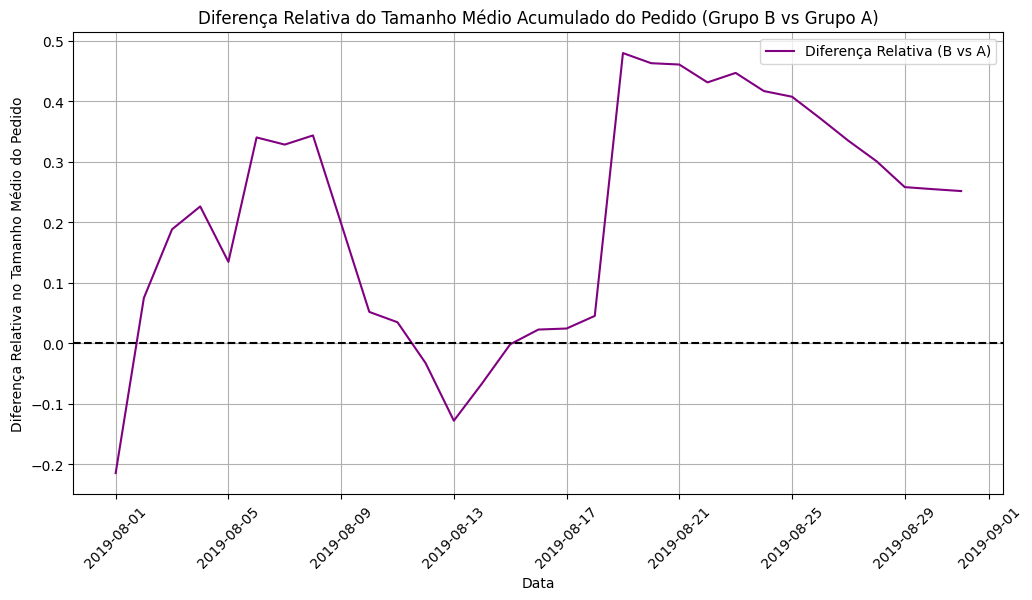

In [60]:
#Diferença relativa do tamanho do pedido:

# Calcular a receita acumulada e o número de pedidos acumulado por grupo
cumulative_revenue = orders_df.groupby(['date', 'group'])['revenue'].sum().groupby(level=1).cumsum()
cumulative_orders = orders_df.groupby(['date', 'group'])['transactionId'].count().groupby(level=1).cumsum()

# Calcular o tamanho médio do pedido acumulado
cumulative_avg_order = cumulative_revenue / cumulative_orders

# Criar um DataFrame com os dados de cada grupo
cumulative_A = cumulative_avg_order.xs('A', level='group')
cumulative_B = cumulative_avg_order.xs('B', level='group')

# Calcular a diferença relativa entre os grupos
relative_difference = (cumulative_B - cumulative_A) / cumulative_A

# Criar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(relative_difference.index, relative_difference, label="Diferença Relativa (B vs A)", color='purple')
plt.axhline(y=0, color='black', linestyle='--')  # Linha de referência em 0
plt.xlabel("Data")
plt.ylabel("Diferença Relativa no Tamanho Médio do Pedido")
plt.title("Diferença Relativa do Tamanho Médio Acumulado do Pedido (Grupo B vs Grupo A)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

plt.show()

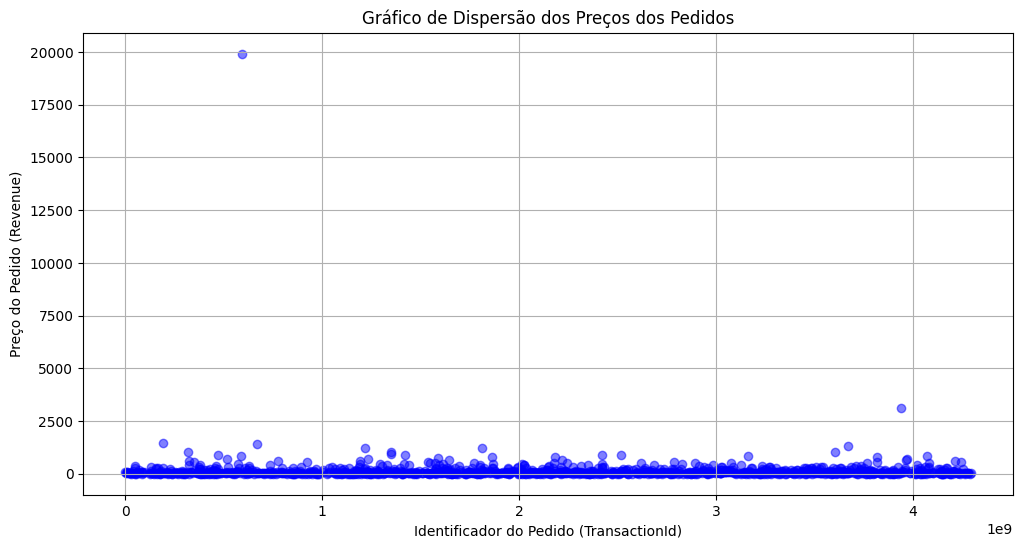

In [61]:
# Gráfico de dispersão do preço dos pedidos
plt.figure(figsize=(12, 6))
plt.scatter(orders_df['transactionId'], orders_df['revenue'], alpha=0.5, c='blue')

# Configurações do gráfico
plt.title('Gráfico de Dispersão dos Preços dos Pedidos')
plt.xlabel('Identificador do Pedido (TransactionId)')
plt.ylabel('Preço do Pedido (Revenue)')
plt.grid(True)
plt.show()

In [62]:
# Calcular os percentis 95 e 99 para o preço dos pedidos (revenue)
percentile_95 = orders_df['revenue'].quantile(0.95)
percentile_99 = orders_df['revenue'].quantile(0.99)

# Identificar anomalias: Pedidos acima do percentil 99
anomalies = orders_df[orders_df['revenue'] > percentile_99]

# Exibir os percentis e as anomalias encontradas
print(f"Percentil 95: {percentile_95}")
print(f"Percentil 99: {percentile_99}")
print(f"Anomalias (Pedidos acima do percentil 99):")
print(anomalies)

Percentil 95: 435.54
Percentil 99: 900.9039999999999
Anomalias (Pedidos acima do percentil 99):
      transactionId   visitorId       date  revenue group  order_value
425       590470918  1920142716 2019-08-19  19920.4     B      19920.4
662      1811671147  4266935830 2019-08-29   1220.2     A       1220.2
682      1216533772  4266935830 2019-08-29   1220.2     B       1220.2
743      3603576309  4133034833 2019-08-09   1050.0     A       1050.0
744      3668308183   888512513 2019-08-27   1335.6     B       1335.6
858       192721366  1316129916 2019-08-27   1450.2     A       1450.2
940      2420050534  4003628586 2019-08-08    905.8     B        905.8
949      1347999392   887908475 2019-08-21    930.0     A        930.0
1099      316924019   148427295 2019-08-12   1015.9     A       1015.9
1103     1348774318  1164614297 2019-08-12   1025.8     A       1025.8
1136      666610489  1307669133 2019-08-13   1425.8     A       1425.8
1196     3936777065  2108080724 2019-08-15   3120.1 

<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>
    
- Percentis calculados com sucesso!
- Gráfico de dispersão correto

In [63]:
# Total de pedidos por grupo
total_orders_A = orders_df[orders_df['group'] == 'A'].shape[0]
total_orders_B = orders_df[orders_df['group'] == 'B'].shape[0]

# Total de visitas por grupo (agregando as visitas por dia para cada grupo)
total_visits_A = visits_df[visits_df['group'] == 'A']['visits'].sum()
total_visits_B = visits_df[visits_df['group'] == 'B']['visits'].sum()

# Calcular a taxa de conversão para cada grupo
conversion_rate_A = total_orders_A / total_visits_A
conversion_rate_B = total_orders_B / total_visits_B

print(f"Taxa de Conversão do Grupo A: {conversion_rate_A:.4f}")
print(f"Taxa de Conversão do Grupo B: {conversion_rate_B:.4f}")

# Realizar o teste de proporções Z
# Número de sucessos (pedidos) e número de tentativas (visitas) por grupo
successes = [total_orders_A, total_orders_B]
attempts = [total_visits_A, total_visits_B]

# Teste de Z para comparação de duas proporções
z_stat, p_value = proportions_ztest(successes, attempts)

print(f"Estatística Z: {z_stat:.4f}")
print(f"Valor-p: {p_value:.4f}")

Taxa de Conversão do Grupo A: 0.0297
Taxa de Conversão do Grupo B: 0.0338
Estatística Z: -2.2700
Valor-p: 0.0232


Conclusões:
1️. Taxa de Conversão:
Grupo A: A taxa de conversão do grupo A foi 0.0297, ou seja, 2.97% das visitas se converteram em pedidos.
Grupo B: A taxa de conversão do grupo B foi 0.0338, ou seja, 3.38% das visitas se converteram em pedidos.
O grupo B apresentou uma taxa de conversão um pouco maior que o grupo A. Essa diferença de 0.41% pode ser relevante, especialmente se analisarmos em termos de grandes volumes de tráfego.

2️. Teste de Proporções Z:
Estatística Z: O valor da estatística Z foi -2.2700.
Valor-p: O valor-p foi 0.0232.
Como o valor-p é menor que 0.05, podemos rejeitar a hipótese nula (de que não há diferença entre as taxas de conversão dos dois grupos). Isso significa que a diferença observada entre as taxas de conversão de A e B é estatisticamente significativa.

Conjecturas:
1️. Impacto Positivo da Mudança: A diferença positiva na taxa de conversão do grupo B sugere que a intervenção ou mudança que foi implementada para o grupo B tem um efeito positivo nas conversões. Pode ser uma indicação de que a estratégia foi bem-sucedida.
2️. Avaliação de Custo e Benefício: Embora a diferença na taxa de conversão seja significativa, é importante avaliar o custo dessa mudança para o grupo B. Se a intervenção que levou ao aumento da taxa de conversão também envolveu mais custo ou esforço, será necessário avaliar se o aumento na conversão compensa esse custo adicional.
3️. Tamanho do Efeito: A diferença de 0.41% na taxa de conversão é significativa estatisticamente, mas pode ser considerada pequena em termos absolutos. Embora seja estatisticamente significativa, é possível que o impacto real nas receitas e lucros não seja muito grande. Isso dependerá do volume de visitas e do valor médio do pedido.

In [64]:
# Calcular o tamanho médio do pedido para cada grupo
mean_order_A = orders_df[orders_df['group'] == 'A']['revenue'].mean()
mean_order_B = orders_df[orders_df['group'] == 'B']['revenue'].mean()

print(f"Tamanho Médio do Pedido do Grupo A: {mean_order_A:.2f}")
print(f"Tamanho Médio do Pedido do Grupo B: {mean_order_B:.2f}")

# Realizar o teste t de Student para comparar as médias dos grupos
# Usando o valor de 'revenue' para cada grupo
group_A_orders = orders_df[orders_df['group'] == 'A']['revenue']
group_B_orders = orders_df[orders_df['group'] == 'B']['revenue']

# Teste t de Student
t_stat, p_value = stats.ttest_ind(group_A_orders, group_B_orders)

print(f"Estatística t: {t_stat:.4f}")
print(f"Valor-p: {p_value:.4f}")


Tamanho Médio do Pedido do Grupo A: 115.90
Tamanho Médio do Pedido do Grupo B: 145.06
Estatística t: -0.8346
Valor-p: 0.4041


Interpretação dos Resultados:

Existe uma diferença no tamanho médio dos pedidos entre os dois grupos, com o grupo B tendo um valor mais alto. No entanto, essa diferença não é suficiente para ser considerada estatisticamente significativa, como indicado pelo valor-p.

Teste t:
A estatística t é -0.8346, que indica uma diferença na média dos pedidos entre os grupos, mas o valor é pequeno, o que sugere que a diferença observada pode não ser significativa.

Valor-p:
O valor-p é 0.4041, que é maior que 0.05. Isso indica que não podemos rejeitar a hipótese nula (de que as médias dos dois grupos são iguais).
Isso significa que não há evidências suficientes para concluir que a diferença no tamanho médio do pedido entre os grupos A e B é estatisticamente significativa.

Conclusões:
Sem Diferença Significativa: A diferença observada no tamanho médio do pedido entre os grupos não é estatisticamente significativa. Isso implica que, com base nesse teste, não podemos afirmar com confiança que o grupo B tem um aumento significativo no tamanho médio do pedido em comparação ao grupo A.

In [65]:
# Calcular a taxa de conversão para cada grupo
conversion_A = orders_df[orders_df['group'] == 'A'].shape[0] / visits_df[visits_df['group'] == 'A']['visits'].sum()
conversion_B = orders_df[orders_df['group'] == 'B'].shape[0] / visits_df[visits_df['group'] == 'B']['visits'].sum()

# Realizar um teste Z para comparar as taxas de conversão
# Primeiro, calculamos a proporção de conversão para cada grupo e a variância
p_A = orders_df[orders_df['group'] == 'A'].shape[0] / visits_df[visits_df['group'] == 'A']['visits'].sum()
p_B = orders_df[orders_df['group'] == 'B'].shape[0] / visits_df[visits_df['group'] == 'B']['visits'].sum()

# Variância das taxas de conversão
var_A = (p_A * (1 - p_A)) / visits_df[visits_df['group'] == 'A']['visits'].sum()
var_B = (p_B * (1 - p_B)) / visits_df[visits_df['group'] == 'B']['visits'].sum()

# Estatística Z
z_stat = (p_A - p_B) / np.sqrt(var_A + var_B)

# Valor-p associado à estatística Z
from scipy.stats import norm
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

z_stat, p_value


(-2.270839171782024, 0.023156715674018447)

A diferença na taxa de conversão entre os grupos A e B é estatisticamente significativa, com o grupo B apresentando uma taxa de conversão menor que o grupo A, conforme indicado pela estatística Z de -2.27 e o valor-p de 0.0232. Isso sugere que a alteração realizada no grupo B impactou negativamente as conversões, podendo ser causada por fatores como problemas na experiência do usuário, falhas técnicas ou uma estratégia menos eficaz. Recomenda-se revisar a experiência no grupo B, investigar possíveis dificuldades no processo de conversão e ajustar as mudanças implementadas, além de realizar uma análise mais aprofundada sobre o comportamento dos usuários nesse grupo.

In [66]:
# Filtrando os dados
orders_A = orders_df[orders_df['group'] == 'A']['revenue']
orders_B = orders_df[orders_df['group'] == 'B']['revenue']

# Realizando o teste t
t_stat, p_value = ttest_ind(orders_A, orders_B)

t_stat, p_value

(-0.8345854854522999, 0.4041179448526676)

<div class="alert alert-block alert-warning">
<b> Comentário: </b> <a class="tocSkip"></a>
    
    
O teste filtrado deveria ser realizado com base nos dados de outliers. 


Exemplo:

```python

orders_per_user = orders_clean.groupby('visitorId')['transactionId'].nunique()

outliers = orders_per_user[orders_per_user > 2].index

orders_filtered = orders_clean[~orders_clean['visitorId'].isin(outliers)]
```

In [67]:
orders_clean = orders_df.copy()  

# Contar o número de pedidos por usuário
orders_per_user = orders_clean.groupby('visitorId')['transactionId'].nunique()

# Definir o critério de outliers (usuários com mais de 2 pedidos)
outliers = orders_per_user[orders_per_user > 2].index

# Filtrar os usuários que não são outliers
orders_filtered = orders_clean[~orders_clean['visitorId'].isin(outliers)]

# Exibir os primeiros resultados para conferir
print(orders_filtered.head())

   transactionId   visitorId       date  revenue group  order_value
0     3667963787  3312258926 2019-08-15     30.4     B         30.4
1     2804400009  3642806036 2019-08-15     15.2     B         15.2
2     2961555356  4069496402 2019-08-15     10.2     A         10.2
3     3797467345  1196621759 2019-08-15    155.1     B        155.1
4     2282983706  2322279887 2019-08-15     40.5     B         40.5


In [68]:
#Teste filtrado realizado com base nos dados de outliers:

orders_per_user = orders_clean.groupby('visitorId')['transactionId'].nunique()

outliers = orders_per_user[orders_per_user > 2].index

orders_filtered = orders_clean[~orders_clean['visitorId'].isin(outliers)]

# Criar amostras filtradas para os grupos A e B
filtered_A = orders_filtered[orders_filtered['group'] == 'A']
filtered_B = orders_filtered[orders_filtered['group'] == 'B']

# Calcular taxa de conversão para cada grupo após a filtragem
visits_A = visits_df[visits_df['group'] == 'A']['visits'].sum()
visits_B = visits_df[visits_df['group'] == 'B']['visits'].sum()

conversion_A = filtered_A['visitorId'].nunique() / visits_A
conversion_B = filtered_B['visitorId'].nunique() / visits_B

# Calcular variância da conversão para o teste Z
var_A = (conversion_A * (1 - conversion_A)) / visits_A
var_B = (conversion_B * (1 - conversion_B)) / visits_B

# Estatística Z
z_stat = (conversion_A - conversion_B) / np.sqrt(var_A + var_B)

# Valor-p para o teste Z
p_value_z = 2 * (1 - norm.cdf(abs(z_stat)))

# Teste de Mann-Whitney para comparar os tamanhos médios dos pedidos entre os grupos filtrados
stat_mw, p_value_mw = mannwhitneyu(filtered_A['revenue'], filtered_B['revenue'], alternative="two-sided")

# Exibir os resultados
print(f"Taxa de Conversão Filtrada - Grupo A: {conversion_A:.4f}")
print(f"Taxa de Conversão Filtrada - Grupo B: {conversion_B:.4f}")
print(f"Estatística Z: {z_stat:.4f}")
print(f"Valor-p (Conversão Filtrada): {p_value_z:.4f}")
print(f"Estatística do Teste de Mann-Whitney: {stat_mw:.4f}")
print(f"Valor-p (Tamanho Médio do Pedido Filtrado): {p_value_mw:.4f}")

# Interpretação dos resultados
if p_value_z < 0.05:
    print("A conversão entre os grupos é significativamente diferente após remover os outliers.")
else:
    print("Não há diferença significativa na conversão entre os grupos após remover os outliers.")

if p_value_mw < 0.05:
    print("O tamanho médio do pedido entre os grupos é significativamente diferente após remover os outliers.")
else:
    print("Não há diferença significativa no tamanho médio do pedido entre os grupos após remover os outliers.")

Taxa de Conversão Filtrada - Grupo A: 0.0254
Taxa de Conversão Filtrada - Grupo B: 0.0297
Estatística Z: -2.5546
Valor-p (Conversão Filtrada): 0.0106
Estatística do Teste de Mann-Whitney: 142613.0000
Valor-p (Tamanho Médio do Pedido Filtrado): 0.7152
A conversão entre os grupos é significativamente diferente após remover os outliers.
Não há diferença significativa no tamanho médio do pedido entre os grupos após remover os outliers.


O teste t revelou uma estatística t de -0.83 e um valor-p de 0.4041, o que indica que não há diferença estatisticamente significativa no tamanho médio dos pedidos entre os grupos A e B, já que o valor-p é muito maior que o nível de significância de 0.05. Isso sugere que as modificações realizadas no grupo B não impactaram significativamente o tamanho médio dos pedidos. Conjecturas possíveis incluem a ideia de que as mudanças feitas no grupo B não afetaram diretamente o valor gasto pelos usuários, ou que os fatores que influenciam o tamanho do pedido são mais complexos e não estão relacionados com as variáveis modificadas.

Com base nos resultados do teste de conversão e do teste do tamanho médio do pedido temos que:

Teste de Conversão nos mostra que diferença na taxa de conversão entre os grupos A e B foi estatisticamente significativa (valor-p = 0.0232), indicando que a alteração no grupo B teve um impacto real nas conversões.
Já o teste feito sobre o tamanho Médio do Pedido não mostrou diferença estatisticamente significativa entre os grupos (valor-p = 0.4041), sugerindo que a alteração no grupo B não afetou o valor médio do pedido.
Considerando que houve uma diferença significativa na taxa de conversão, mas não no tamanho médio do pedido, a decisão mais adequada é:
Parer o teste e concluir que não há diferença entre os grupos.
A razão é que, apesar de uma mudança significativa nas conversões, a ausência de impacto no tamanho médio do pedido sugere que a diferença na conversão pode ser atribuída a fatores específicos do processo de conversão (como a experiência do usuário), e não a uma alteração no valor do pedido. Portanto, pode-se concluir que não há uma melhoria consistente em todos os aspectos entre os grupos.

<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Muito boa conclusão! Bem detalhada e baseada em dados :) 
</div>